In [ ]:
!ps aux
!kill -9 <pid>

USER         PID %CPU %MEM    VSZ   RSS TTY      STAT START   TIME COMMAND
root           1  0.0  0.0    992     4 ?        Ss   07:11   0:00 /sbin/docker-
root           7  0.1  0.3 340840 51148 ?        Sl   07:11   0:01 /tools/node/b
root          17  0.0  0.0  35892  4808 ?        Ss   07:11   0:00 tail -n +0 -F
root          40  0.0  0.3 160352 41768 ?        S    07:12   0:00 python3 /usr/
root          65  0.1  0.4 193896 60212 ?        Sl   07:12   0:02 /usr/bin/pyth
root          66  0.1  0.0 707976  9624 ?        Sl   07:12   0:02 /usr/local/bi
root          96  0.3  0.1 128152 16128 ?        Sl   07:12   0:04 /usr/bin/pyth
root         158  0.0  0.0  18380   304 ?        S    07:14   0:00 /bin/bash --n
root         159  0.0  0.1 2167348 18272 ?       Sl   07:14   0:00 /opt/google/d
root         160  0.0  0.0  11604  2176 ?        S    07:14   0:00 grep --color=
root         266  0.0  0.3 2548208 44544 ?       Sl   07:15   0:00 /opt/google/d
root         338  0.0  0.0  18380 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten,MaxPooling2D,Conv2D
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam,SGD

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
classes = ['neutral', 'happy']
nb_classes = len(classes)
batch_size_for_data_generator = 20

base_dir = '/content/drive/MyDrive/jphack/sprit_data'

train_dir = base_dir+'/train'
valid_dir = base_dir+'/validation'

# VGG16用に224x224
img_rows, img_cols = 224, 224

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(img_rows, img_cols),
                                                    color_mode='rgb',
                                                    classes=classes,
                                                    class_mode='categorical',
                                                    batch_size=32,
                                                    shuffle=True)

Found 3199 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
valid_generator = test_datagen.flow_from_directory(directory=valid_dir,
                                                   target_size=(img_rows, img_cols),
                                                   color_mode='rgb',
                                                   classes=classes,
                                                   class_mode='categorical',
                                                   batch_size=32,
                                                   shuffle=True)

Found 801 images belonging to 2 classes.


In [ ]:
input_tensor = Input(shape=(224, 224, 3))
vgg16_model = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

top_model = Sequential()
top_model.add(Flatten(input_shape=vgg16_model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(nb_classes, activation='sigmoid'))

58900480/58889256 [==============================] - 2s 0us/step


In [ ]:
model = Model(vgg16_model.input, top_model(vgg16_model.output))

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# layerを表示
for i in range(len(model.layers)):
    print(i, model.layers[i])

0 <keras.engine.input_layer.InputLayer object at 0x7f6488f8ba90>
1 <keras.layers.convolutional.Conv2D object at 0x7f6488f8ba10>
2 <keras.layers.convolutional.Conv2D object at 0x7f6489ffc850>
3 <keras.layers.pooling.MaxPooling2D object at 0x7f6489eec150>
4 <keras.layers.convolutional.Conv2D object at 0x7f6489c8c890>
5 <keras.layers.convolutional.Conv2D object at 0x7f6489c94e90>
6 <keras.layers.pooling.MaxPooling2D object at 0x7f6489c9cfd0>
7 <keras.layers.convolutional.Conv2D object at 0x7f6489c94190>
8 <keras.layers.convolutional.Conv2D object at 0x7f6489ca5690>
9 <keras.layers.convolutional.Conv2D object at 0x7f6489c2e8d0>
10 <keras.layers.pooling.MaxPooling2D object at 0x7f6489c32c50>
11 <keras.layers.convolutional.Conv2D object at 0x7f6489ca7590>
12 <keras.layers.convolutional.Conv2D object at 0x7f6489c3c050>
13 <keras.layers.convolutional.Conv2D object at 0x7f6489c41190>
14 <keras.layers.pooling.MaxPooling2D object at 0x7f6489c3c150>
15 <keras.layers.convolutional.Conv2D object at 

In [ ]:
# 最後のconv層の直前までの層をfreeze
for layer in model.layers[:15]:
    layer.trainable = False

In [ ]:
 model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss='categorical_crossentropy',
                optimizer=SGD(lr=1e-4, momentum=0.9),
                metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=99,
                    epochs=25,
                    validation_data=valid_generator,
                    validation_steps=25,
                    verbose=1)

Epoch 1/25
99/99 [==============================] - 2157s 21s/step - loss: 0.7006 - acc: 0.5841 - val_loss: 0.6193 - val_acc: 0.6513
Epoch 2/25
99/99 [==============================] - 56s 568ms/step - loss: 0.5991 - acc: 0.6786 - val_loss: 0.5630 - val_acc: 0.7175
Epoch 3/25
99/99 [==============================] - 56s 568ms/step - loss: 0.5449 - acc: 0.7288 - val_loss: 0.4999 - val_acc: 0.7613
Epoch 4/25
99/99 [==============================] - 56s 568ms/step - loss: 0.5000 - acc: 0.7521 - val_loss: 0.4661 - val_acc: 0.7688
Epoch 5/25
99/99 [==============================] - 56s 566ms/step - loss: 0.4531 - acc: 0.7837 - val_loss: 0.4221 - val_acc: 0.7837
Epoch 6/25
99/99 [==============================] - 57s 569ms/step - loss: 0.4242 - acc: 0.7982 - val_loss: 0.3748 - val_acc: 0.8363
Epoch 7/25
99/99 [==============================] - 56s 565ms/step - loss: 0.3901 - acc: 0.8232 - val_loss: 0.3584 - val_acc: 0.8325
Epoch 8/25
99/99 [==============================] - 56s 567ms/step - 

In [ ]:
hdf5_file = os.path.join(base_dir, 'VGG16data.hdf5')
model.save(hdf5_file)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
print(history.history)

{'loss': [0.7006461024284363, 0.5991108417510986, 0.5448935627937317, 0.5000405311584473, 0.45312735438346863, 0.4241638481616974, 0.3900797367095947, 0.3719223439693451, 0.3504854440689087, 0.3327614665031433, 0.3173251152038574, 0.29815685749053955, 0.2937752604484558, 0.2825034558773041, 0.28198838233947754, 0.2589486837387085, 0.24919112026691437, 0.24336479604244232, 0.23881183564662933, 0.2281087040901184, 0.22393490374088287, 0.2229209542274475, 0.2174825817346573, 0.21581541001796722, 0.21103408932685852], 'acc': [0.5841490626335144, 0.6785601377487183, 0.7287653684616089, 0.7521313428878784, 0.7837069630622864, 0.7982317805290222, 0.8231765031814575, 0.8335964679718018, 0.8405430912971497, 0.8544363975524902, 0.8616987466812134, 0.8711714744567871, 0.8752762675285339, 0.8793811202049255, 0.8774865865707397, 0.8945373892784119, 0.8970634937286377, 0.8964319825172424, 0.9014840722084045, 0.9062203764915466, 0.9084306955337524, 0.9112725257873535, 0.9138257503509521, 0.9179033637

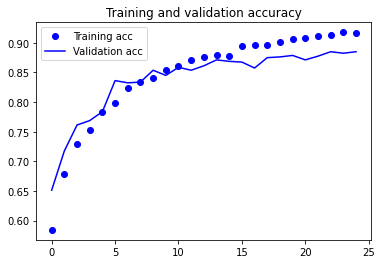

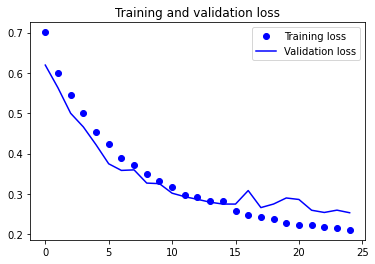

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()